<a href="https://colab.research.google.com/github/szh141/Examples/blob/main/KNN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://python.plainenglish.io/hands-on-k-nearest-neighbors-knn-algorithm-with-python-a6ed65f94e75

break down

In [ ]:
def distance(a, b):
    # implements the euclidean distance between two points
    dist = np.sqrt(np.sum((a-b)**2))
    return dist

In [ ]:
def predict_point(point, X_train, y_train, k, task):
    # distance from each point to train data
    distances = [distance(point, x) for x in X_train]

    # find the k closest points
    indices = np.argsort(distances)[:k]

    # get the predicted label based on the task
    labels = [y_train[ind] for ind in indices]

    if task == 'regression':
        return np.average(labels)
    elif task == 'classification':
        return np.bincount(labels).argmax()

In [ ]:
def predict(X_test, X_train, y_train, k, task):
    y_pred = [predict_point(x, X_train, y_train, k, task) for x in X_test]
    return np.array(y_pred)

The k value in the k-NN algorithm defines how many neighbors will be checked to determine the classification of a specific query point. For example, if k=1, the instance will be assigned to the same class as its single nearest neighbor.

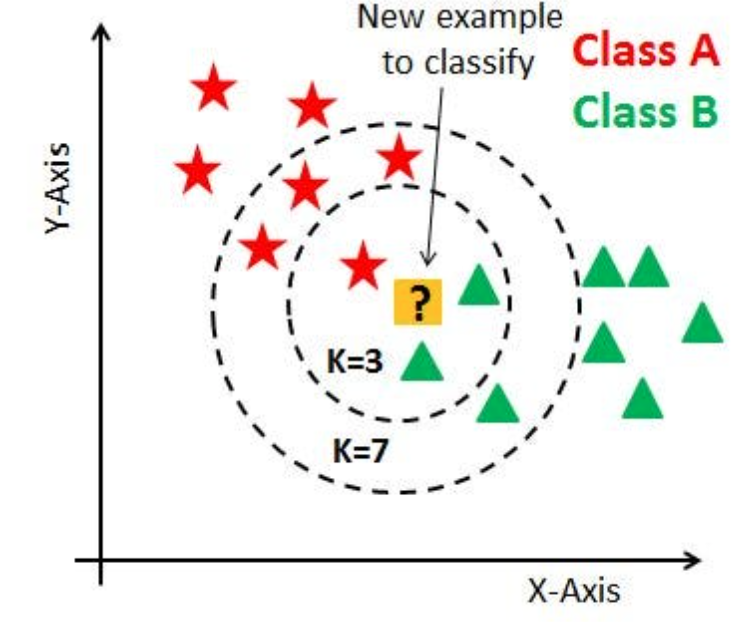

Putting it all together

In [1]:
import numpy as np


class KNN:
    # constructor function
    def __init__(self, k, task = 'classification'):
        self.k = k
        self.task = task

    # euclidean distance auxiliar function
    def distance(self, a, b):
        # implements the euclidean distance between two points
        dist = np.sqrt(np.sum((a-b)**2))
        return dist

    # fit function
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict_point(self, point):
        # distance from each point to train data
        distances = [self.distance(point, x) for x in self.X_train]

        # find the k closest points
        indices = np.argsort(distances)[:self.k]

        # get the predicted label based on the task
        labels = [self.y_train[ind] for ind in indices]

        if self.task == 'regression':
            return np.average(labels)
        elif self.task == 'classification':
            return np.bincount(labels).argmax()

    # predict function for test dataset
    def predict(self, X_test):
        y_pred = [self.predict_point(x) for x in X_test]
        return np.array(y_pred)

    # accuracy function to calculate how many predictions are correct
    def accuracy(self, y_pred, y_test):
        # Check if the input lists have the same length
        if len(y_test) != len(y_pred):
            raise ValueError("Input lists must have the same length.")

        # Count the number of correct predictions
        correct_predictions = sum(1 for test, pred in zip(y_test, y_pred) if test == pred)

        # Calculate accuracy
        accuracy = correct_predictions / len(y_test) * 100.0

        return accuracy

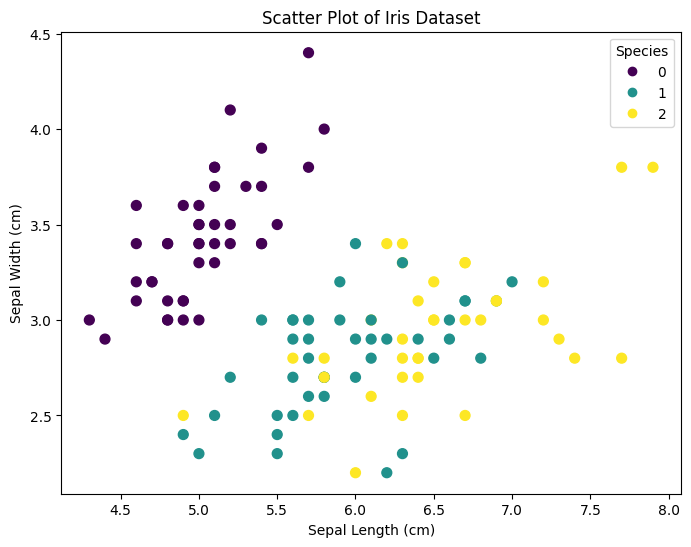

In [2]:
# import additional modules
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import random

# auxiliar function to split dataset
def train_test_split(data, labels, test_size = 0.2):
    # Check if data and labels have the same length
    if len(data) != len(labels):
        raise ValueError("Data and labels must have the same length.")

    # Shuffle indices
    indices = list(range(len(data)))
    random.shuffle(indices)

    # Calculate the number of samples for the test set
    test_size = int(len(data) * test_size)

    # Split the data and labels
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]

    X_train = [data[i] for i in train_indices]
    X_test = [data[i] for i in test_indices]
    y_train = [labels[i] for i in train_indices]
    y_test = [labels[i] for i in test_indices]

    return X_train, X_test, y_train, y_test

# Load the Iris dataset from sklearn
iris_data = datasets.load_iris()
data = iris_data.data
target = iris_data.target

# split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target)

# create dataframes to create plots
iris_df_train = pd.DataFrame(X_train, columns=iris_data.feature_names)
iris_df_train['species'] = y_train

iris_df_test = pd.DataFrame(X_test, columns=iris_data.feature_names)
iris_df_test['species'] = y_test

# Create a scatter plot with different symbols for each target value
plt.figure(figsize=(8, 6))
scatter = plt.scatter(iris_df_train['sepal length (cm)'], iris_df_train['sepal width (cm)'],
                      c=iris_df_train['species'], marker='o', s=50)

# Legend
legend_elements = scatter.legend_elements()
legend = plt.legend(legend_elements[0], legend_elements[1], title="Species")
plt.title('Scatter Plot of Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

# show the plot
plt.show()

In [4]:
model = KNN(k=5, task='classification')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = model.accuracy(y_pred, y_test)
print(acc)

93.33333333333333


In [11]:
model = KNN(k=3, task='classification')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = model.accuracy(y_pred, y_test)
print(acc)

96.66666666666667
